In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as font_manager

In [2]:
# 한글 폰트 찾기
import matplotlib.font_manager as font_manager

# 특정 위치에 있는 모든 폰트 찾기
font_dir = ['/Users/kimminsoo/Library/Fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

# font.family 설정
mpl.rcParams['font.family'] = 'NanumGothicOTF'
print(mpl.rcParams['font.family'])

MesloLGS NF
?????
MesloLGS NF
NanumGothicOTF
MesloLGS NF
NanumGothic
MesloLGS NF
Kyobo Handwriting 2021
['NanumGothicOTF']


# 2. 데이터산업 시장 규모 - 매출(천억원)

        1) xlsx파일에서 csv파일로 변환
        2) 'unnamed: 0', 'unnamed: 1'을 '업종 중분류', '업종 소분류'로 변경, 연도 컬럼명 "년"을 제거
        3) 단위 천억원으로 수정한 후, 소수점 첫째자리까지로 통일
        4) 연도별 업종 중분류 시장규모 - barplot, lineplot
        5) 2021년도 업종 중분류 시장규모 - piechart
        6) 연도별 업종 소분류 시장규모 - barplot, lineplot
        7) 2021년도 업종 소분류 시장규모 - piechart

### 1) xlsx 파일에서 csv 파일로 변환

In [3]:
# xlsx파일 데이터를 csv로 변환 후 DataFrame형태로 불러오기 
xlsx = pd.read_excel('../data/data_ids_sales.xlsx')
data_report = xlsx.to_csv('../data/data_ids_sales.csv')
data_ids_report = pd.read_csv('../data/data_ids_sales.csv', index_col=0).reset_index(drop=True)

data_ids_report

,Unnamed: 0,Unnamed: 1,2016년,2017년,2018년,2019년,2020년,2021년 (E)
0,데이터 처리 및 관리 솔루션 개발·공급업,데이터 수집·연계 솔루션 개발·공급업,1345,1393,1621.772014,1871.235803,2122,2787
1,데이터 처리 및 관리 솔루션 개발·공급업,데이터베이스 관리 시스템 솔루션 개발·공급업,6148,6121,6775.481280,7509.620281,8979,11062
2,데이터 처리 및 관리 솔루션 개발·공급업,데이터 분석 솔루션 개발·공급업,1249,1325,1781.516155,2014.369121,2586,2951
3,데이터 처리 및 관리 솔루션 개발·공급업,데이터 관리 솔루션 개발·공급업,5367,4628,4971.604003,5203.494864,6022,7151
4,데이터 처리 및 관리 솔루션 개발·공급업,데이터 보안 솔루션 개발·공급업,5367,1213,1516.904050,1975.393368,2558,3146
5,데이터 처리 및 관리 솔루션 개발·공급업,빅데이터 통합 플랫폼 솔루션 개발·공급업,1611,1776,1949.404500,2231.278359,2866,3468
6,데이터 구축 및 컨설팅 서비스업,데이터 구축/가공 서비스업,54571,57207,58993.113875,62222.502732,72805,81188
7,데이터 구축 및 컨설팅 서비스업,데이터 관련 컨설팅 서비스업,1279,1687,2296.717025,3189.179358,4194,5147
8,데이터 판매 및 제공 서비스업,데이터 판매/중개 서비스업,6123,6608,8198.186753,11331.937956,16054,20781
9,데이터 판매 및 제공 서비스업,정보제공 서비스업,59854,61570,67579.799051,71032.535398,81838,93289


### 2) 'unnamed: 0', 'unnamed: 1'을 '업종 중분류', '업종 소분류'로 변경, 연도 컬럼명 "년"을 제거

In [4]:
# 'unnamed: 0', 'unnamed:1'을 컬럼명 변경
# 다른 방법: columns={'Unnamed: 0': '업종 중분류', 'Unnamed: 1' : '업종 소분류'}, inplace=True)
data_ids_report.rename(columns={
                       data_ids_report.columns[0] : '업종 중분류',
                       data_ids_report.columns[1] : '업종 소분류',
                       data_ids_report.columns[2] : '2016',
                       data_ids_report.columns[3] : '2017',
                       data_ids_report.columns[4] : '2018',
                       data_ids_report.columns[5] : '2019',
                       data_ids_report.columns[6] : '2020',
                       data_ids_report.columns[7] : '2021',}, inplace=True)

# 매출 데이터 타입을 int로 변환
data_ids_report = data_ids_report.astype({'2016':'float',
                                          '2017':'float',
                                          '2018':'float',
                                          '2019':'float',
                                          '2020':'float',
                                         '2021':'float'})

data_ids_report

,업종 중분류,업종 소분류,2016,2017,2018,2019,2020,2021
0,데이터 처리 및 관리 솔루션 개발·공급업,데이터 수집·연계 솔루션 개발·공급업,1345.0,1393.0,1621.772014,1871.235803,2122.0,2787.0
1,데이터 처리 및 관리 솔루션 개발·공급업,데이터베이스 관리 시스템 솔루션 개발·공급업,6148.0,6121.0,6775.481280,7509.620281,8979.0,11062.0
2,데이터 처리 및 관리 솔루션 개발·공급업,데이터 분석 솔루션 개발·공급업,1249.0,1325.0,1781.516155,2014.369121,2586.0,2951.0
3,데이터 처리 및 관리 솔루션 개발·공급업,데이터 관리 솔루션 개발·공급업,5367.0,4628.0,4971.604003,5203.494864,6022.0,7151.0
4,데이터 처리 및 관리 솔루션 개발·공급업,데이터 보안 솔루션 개발·공급업,5367.0,1213.0,1516.904050,1975.393368,2558.0,3146.0
5,데이터 처리 및 관리 솔루션 개발·공급업,빅데이터 통합 플랫폼 솔루션 개발·공급업,1611.0,1776.0,1949.404500,2231.278359,2866.0,3468.0
6,데이터 구축 및 컨설팅 서비스업,데이터 구축/가공 서비스업,54571.0,57207.0,58993.113875,62222.502732,72805.0,81188.0
7,데이터 구축 및 컨설팅 서비스업,데이터 관련 컨설팅 서비스업,1279.0,1687.0,2296.717025,3189.179358,4194.0,5147.0
8,데이터 판매 및 제공 서비스업,데이터 판매/중개 서비스업,6123.0,6608.0,8198.186753,11331.937956,16054.0,20781.0
9,데이터 판매 및 제공 서비스업,정보제공 서비스업,59854.0,61570.0,67579.799051,71032.535398,81838.0,93289.0


### 3) 단위 천억원으로 수정한 후, 소수점 첫째자리까지로 통일

In [5]:

# 소수점 첫째자리로 통일
# 또는 data)ids_report.style.set_precision(1) 
data_ids_report = data_ids_report.round(decimals=1)

data_ids_report

,업종 중분류,업종 소분류,2016,2017,2018,2019,2020,2021
0,데이터 처리 및 관리 솔루션 개발·공급업,데이터 수집·연계 솔루션 개발·공급업,1345.0,1393.0,1621.8,1871.2,2122.0,2787.0
1,데이터 처리 및 관리 솔루션 개발·공급업,데이터베이스 관리 시스템 솔루션 개발·공급업,6148.0,6121.0,6775.5,7509.6,8979.0,11062.0
2,데이터 처리 및 관리 솔루션 개발·공급업,데이터 분석 솔루션 개발·공급업,1249.0,1325.0,1781.5,2014.4,2586.0,2951.0
3,데이터 처리 및 관리 솔루션 개발·공급업,데이터 관리 솔루션 개발·공급업,5367.0,4628.0,4971.6,5203.5,6022.0,7151.0
4,데이터 처리 및 관리 솔루션 개발·공급업,데이터 보안 솔루션 개발·공급업,5367.0,1213.0,1516.9,1975.4,2558.0,3146.0
5,데이터 처리 및 관리 솔루션 개발·공급업,빅데이터 통합 플랫폼 솔루션 개발·공급업,1611.0,1776.0,1949.4,2231.3,2866.0,3468.0
6,데이터 구축 및 컨설팅 서비스업,데이터 구축/가공 서비스업,54571.0,57207.0,58993.1,62222.5,72805.0,81188.0
7,데이터 구축 및 컨설팅 서비스업,데이터 관련 컨설팅 서비스업,1279.0,1687.0,2296.7,3189.2,4194.0,5147.0
8,데이터 판매 및 제공 서비스업,데이터 판매/중개 서비스업,6123.0,6608.0,8198.2,11331.9,16054.0,20781.0
9,데이터 판매 및 제공 서비스업,정보제공 서비스업,59854.0,61570.0,67579.8,71032.5,81838.0,93289.0


In [6]:
# 데이터 전처리 완료된 데이터 프레임 csv 파일로 저장
data_ids_report.to_csv('../data/data_ids_sales.csv', index=False)

### 4) 연도별 업종 중분류 시장규모 - barplot, lineplot

#### 4-1) barplot

In [45]:
# 업종 소분류 컬럼 삭제
mid_ids_report = data_ids_report.drop(['업종 소분류'], axis=1)

# 업종 중분류 별 합계 리스트 생성
mid1 = mid_ids_report.loc[0:5].sum()
mid2 = mid_ids_report.loc[6:7].sum()
mid3 = mid_ids_report.loc[8:9].sum()
mid1[0] = "데이터 처리 및 관리 솔루션 개발·공급업"
mid2[0] = "데이터 구축 및 컨설팅 서비스업"
mid3[0] = "데이터 판매 및 제공 서비스업"

# 생성된 리스트 데이터프레임 형태로 변환
mid_ids_report = pd.DataFrame([mid1, mid2, mid3]).set_index("업종 중분류")

# 단위를 천억원으로 수정
mid_ids_report = mid_ids_report / 1000

mid_ids_report


,2016,2017,2018,2019,2020,2021
업종 중분류,,,,,,
데이터 처리 및 관리 솔루션 개발·공급업,21.087,16.456,18.6167,20.8054,25.133,30.565
데이터 구축 및 컨설팅 서비스업,55.850,58.894,61.2898,65.4117,76.999,86.335
데이터 판매 및 제공 서비스업,65.977,68.178,75.7780,82.3644,97.892,114.070


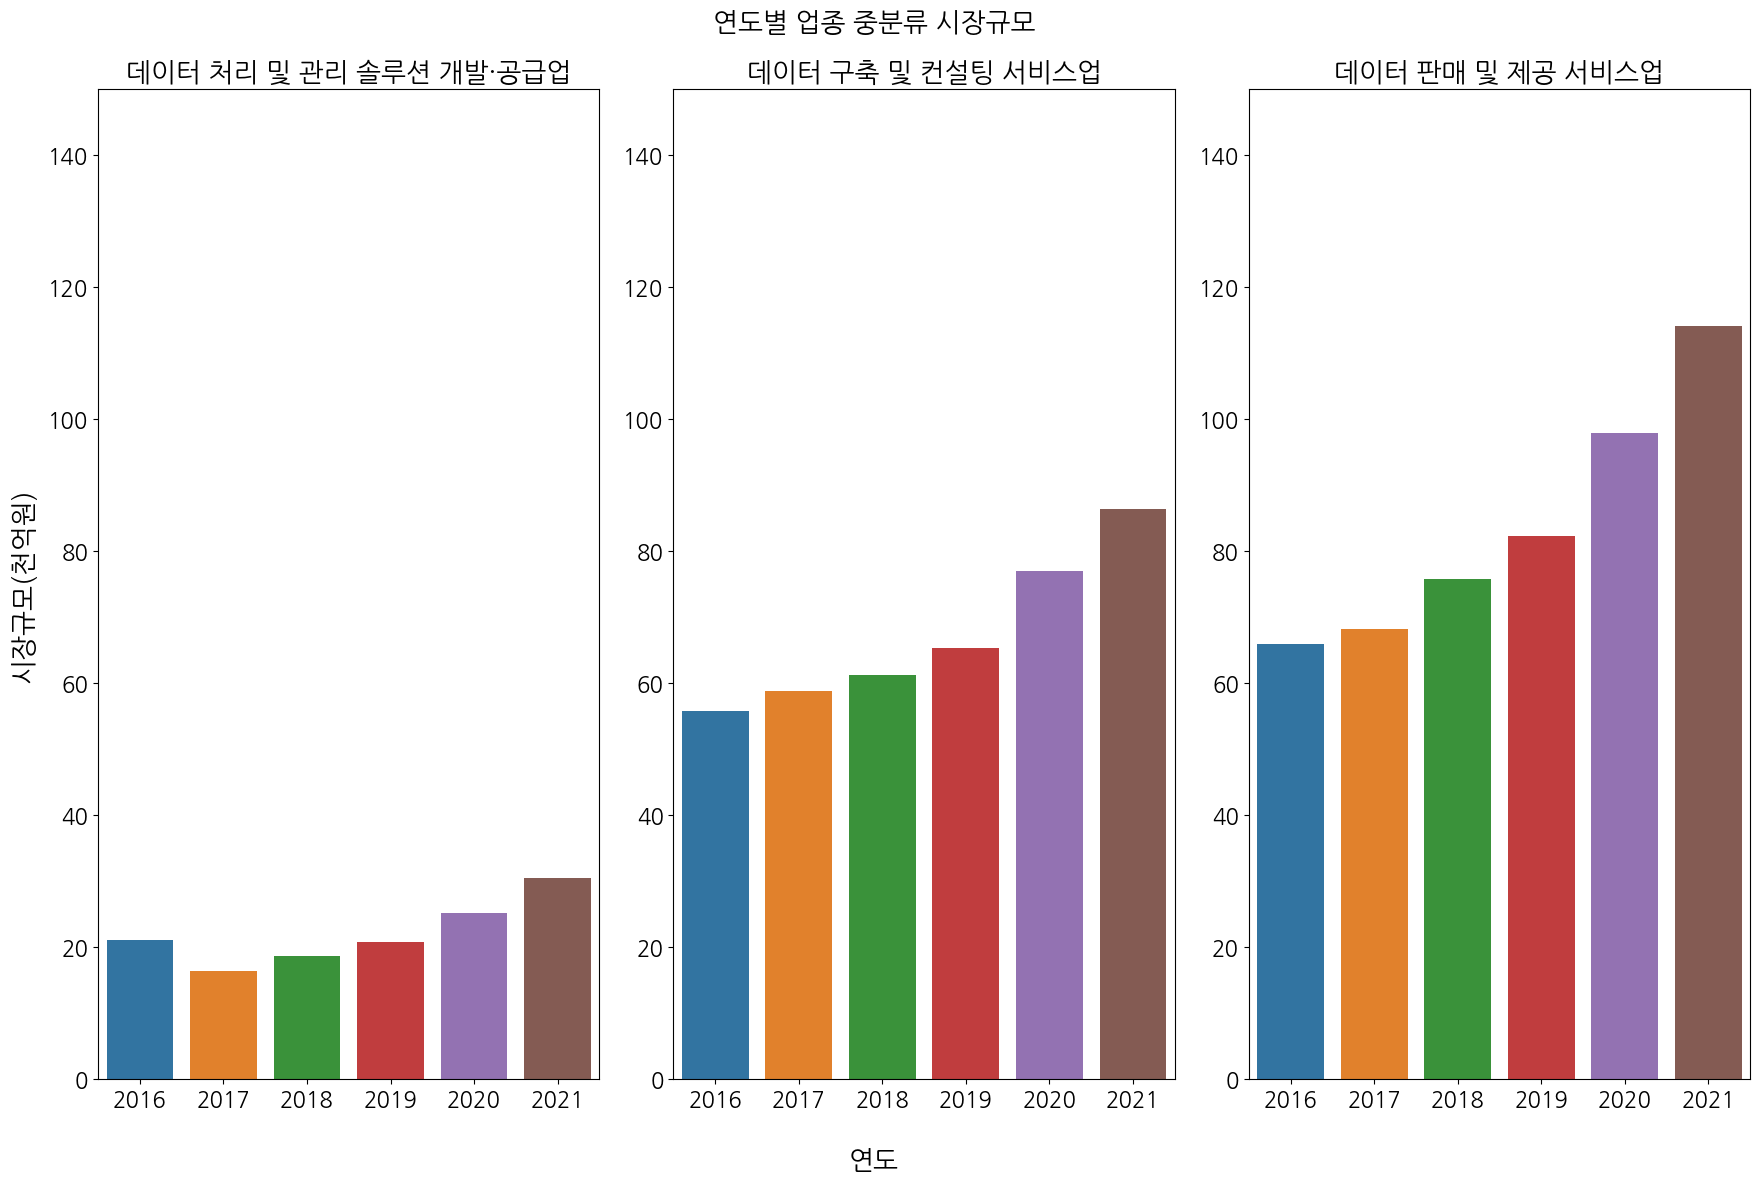

In [47]:
# 중분류 시장규모 시각화 - barplot
plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(1,3)

fig.suptitle("연도별 업종 중분류 시장규모")
fig.supxlabel("연도")
fig.supylabel("시장규모(천억원)")

for index in range(len(mid_ids_report.index)):
    sns.barplot(x=mid_ids_report.columns.astype(int), 
                y=mid_ids_report.iloc[index], 
                ax=axs[index])
    axs[index].set_ylim(0, 150)
    axs[index].set_title(mid_ids_report.index[index])
    axs[index].set_ylabel(None)
plt.tight_layout()
plt.show()

#### 4-2) lineplot

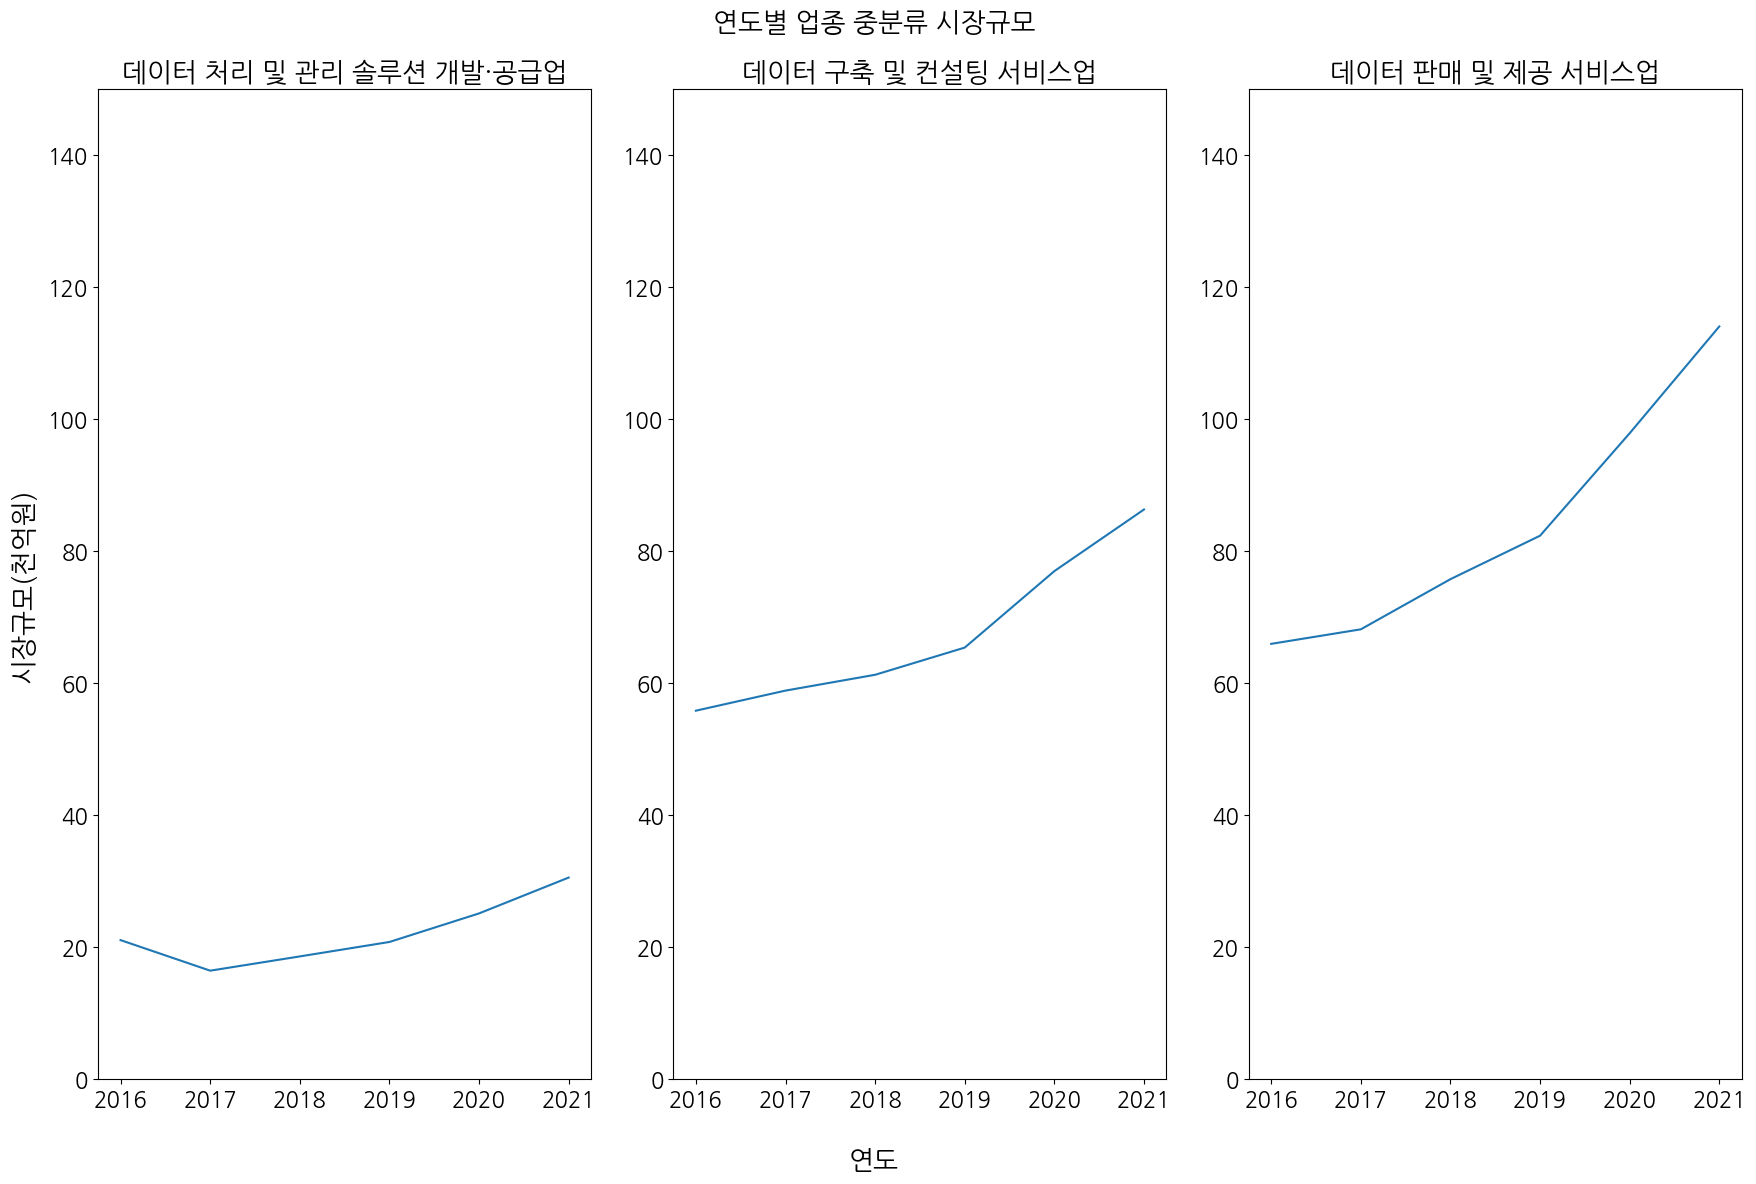

In [48]:
# 중분류 시장규모 시각화 - lineplot
plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(1,3)

fig.suptitle("연도별 업종 중분류 시장규모")
fig.supxlabel("연도")
fig.supylabel("시장규모(천억원)")

for index in range(len(mid_ids_report.index)):
    sns.lineplot(x=mid_ids_report.columns.astype(int), 
                y=mid_ids_report.iloc[index], 
                ax=axs[index])
    axs[index].set_ylim(0, 150)
    axs[index].set_title(mid_ids_report.index[index])
    axs[index].set_ylabel(None)
plt.tight_layout()
plt.show()

### 5) 2021년도 업종 중분류 시장규모 - piechart

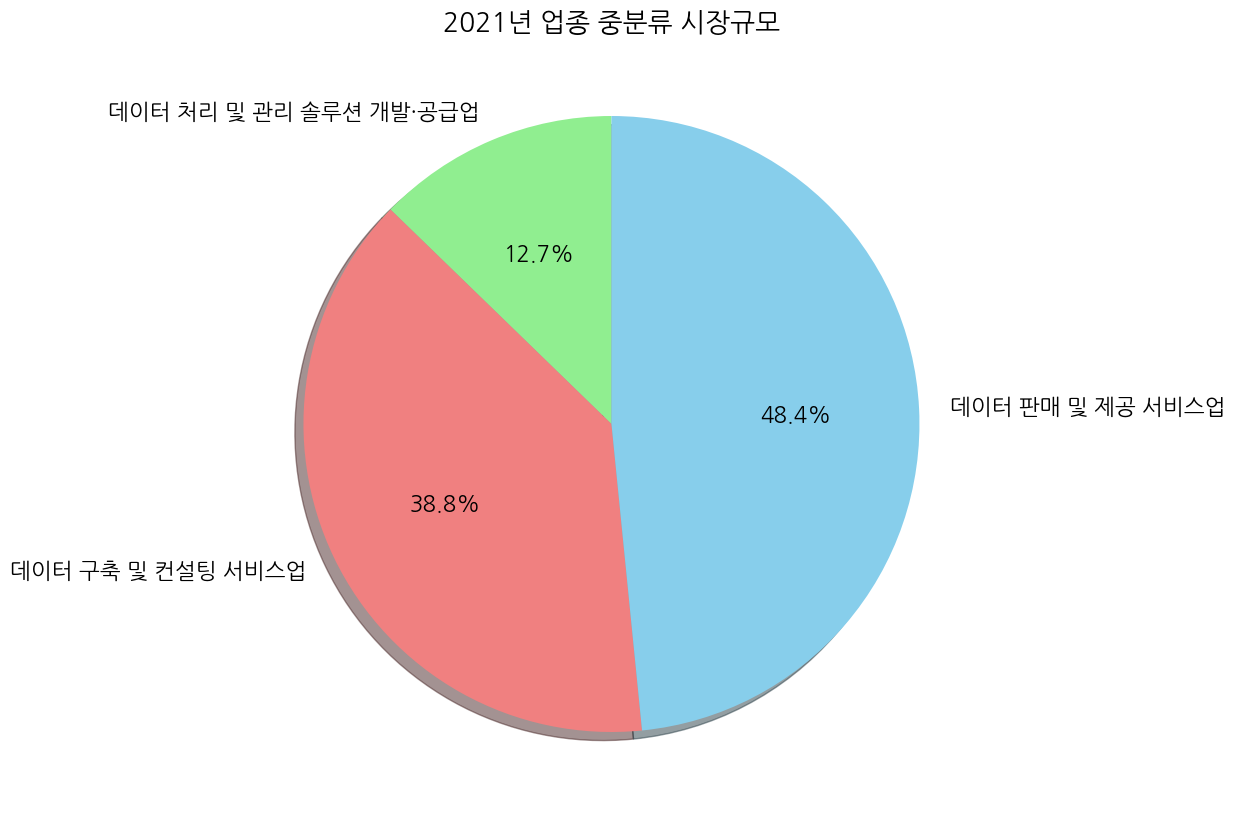

In [49]:
mid_total = mid_ids_report.round(1).sum(axis=1)
mid_totals = ((mid_total / mid_total.sum()) * 100)

explode = [0,0,0]
colors = ['lightgreen', 'lightcoral', 'skyblue']

fig = plt.figure(figsize=(10,10))
plt.title('2021년 업종 중분류 시장규모')
plt.pie(mid_totals.values, explode=explode, labels=mid_totals.index, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

### 6) 연도별 업종 소분류 시장규모 - barplot, lineplot

#### 6-1) barplot

In [63]:
# 업종 중분류 컬럼 삭제
sub_ids_report = data_ids_report.drop(["업종 중분류"], axis=1).set_index("업종 소분류")

# 단위를 천억원으로 수정
sub_ids_report = sub_ids_report / 1000

sub_ids_report

,2016,2017,2018,2019,2020,2021
업종 소분류,,,,,,
데이터 수집·연계 솔루션 개발·공급업,1.345,1.393,1.6218,1.8712,2.122,2.787
데이터베이스 관리 시스템 솔루션 개발·공급업,6.148,6.121,6.7755,7.5096,8.979,11.062
데이터 분석 솔루션 개발·공급업,1.249,1.325,1.7815,2.0144,2.586,2.951
데이터 관리 솔루션 개발·공급업,5.367,4.628,4.9716,5.2035,6.022,7.151
데이터 보안 솔루션 개발·공급업,5.367,1.213,1.5169,1.9754,2.558,3.146
빅데이터 통합 플랫폼 솔루션 개발·공급업,1.611,1.776,1.9494,2.2313,2.866,3.468
데이터 구축/가공 서비스업,54.571,57.207,58.9931,62.2225,72.805,81.188
데이터 관련 컨설팅 서비스업,1.279,1.687,2.2967,3.1892,4.194,5.147
데이터 판매/중개 서비스업,6.123,6.608,8.1982,11.3319,16.054,20.781


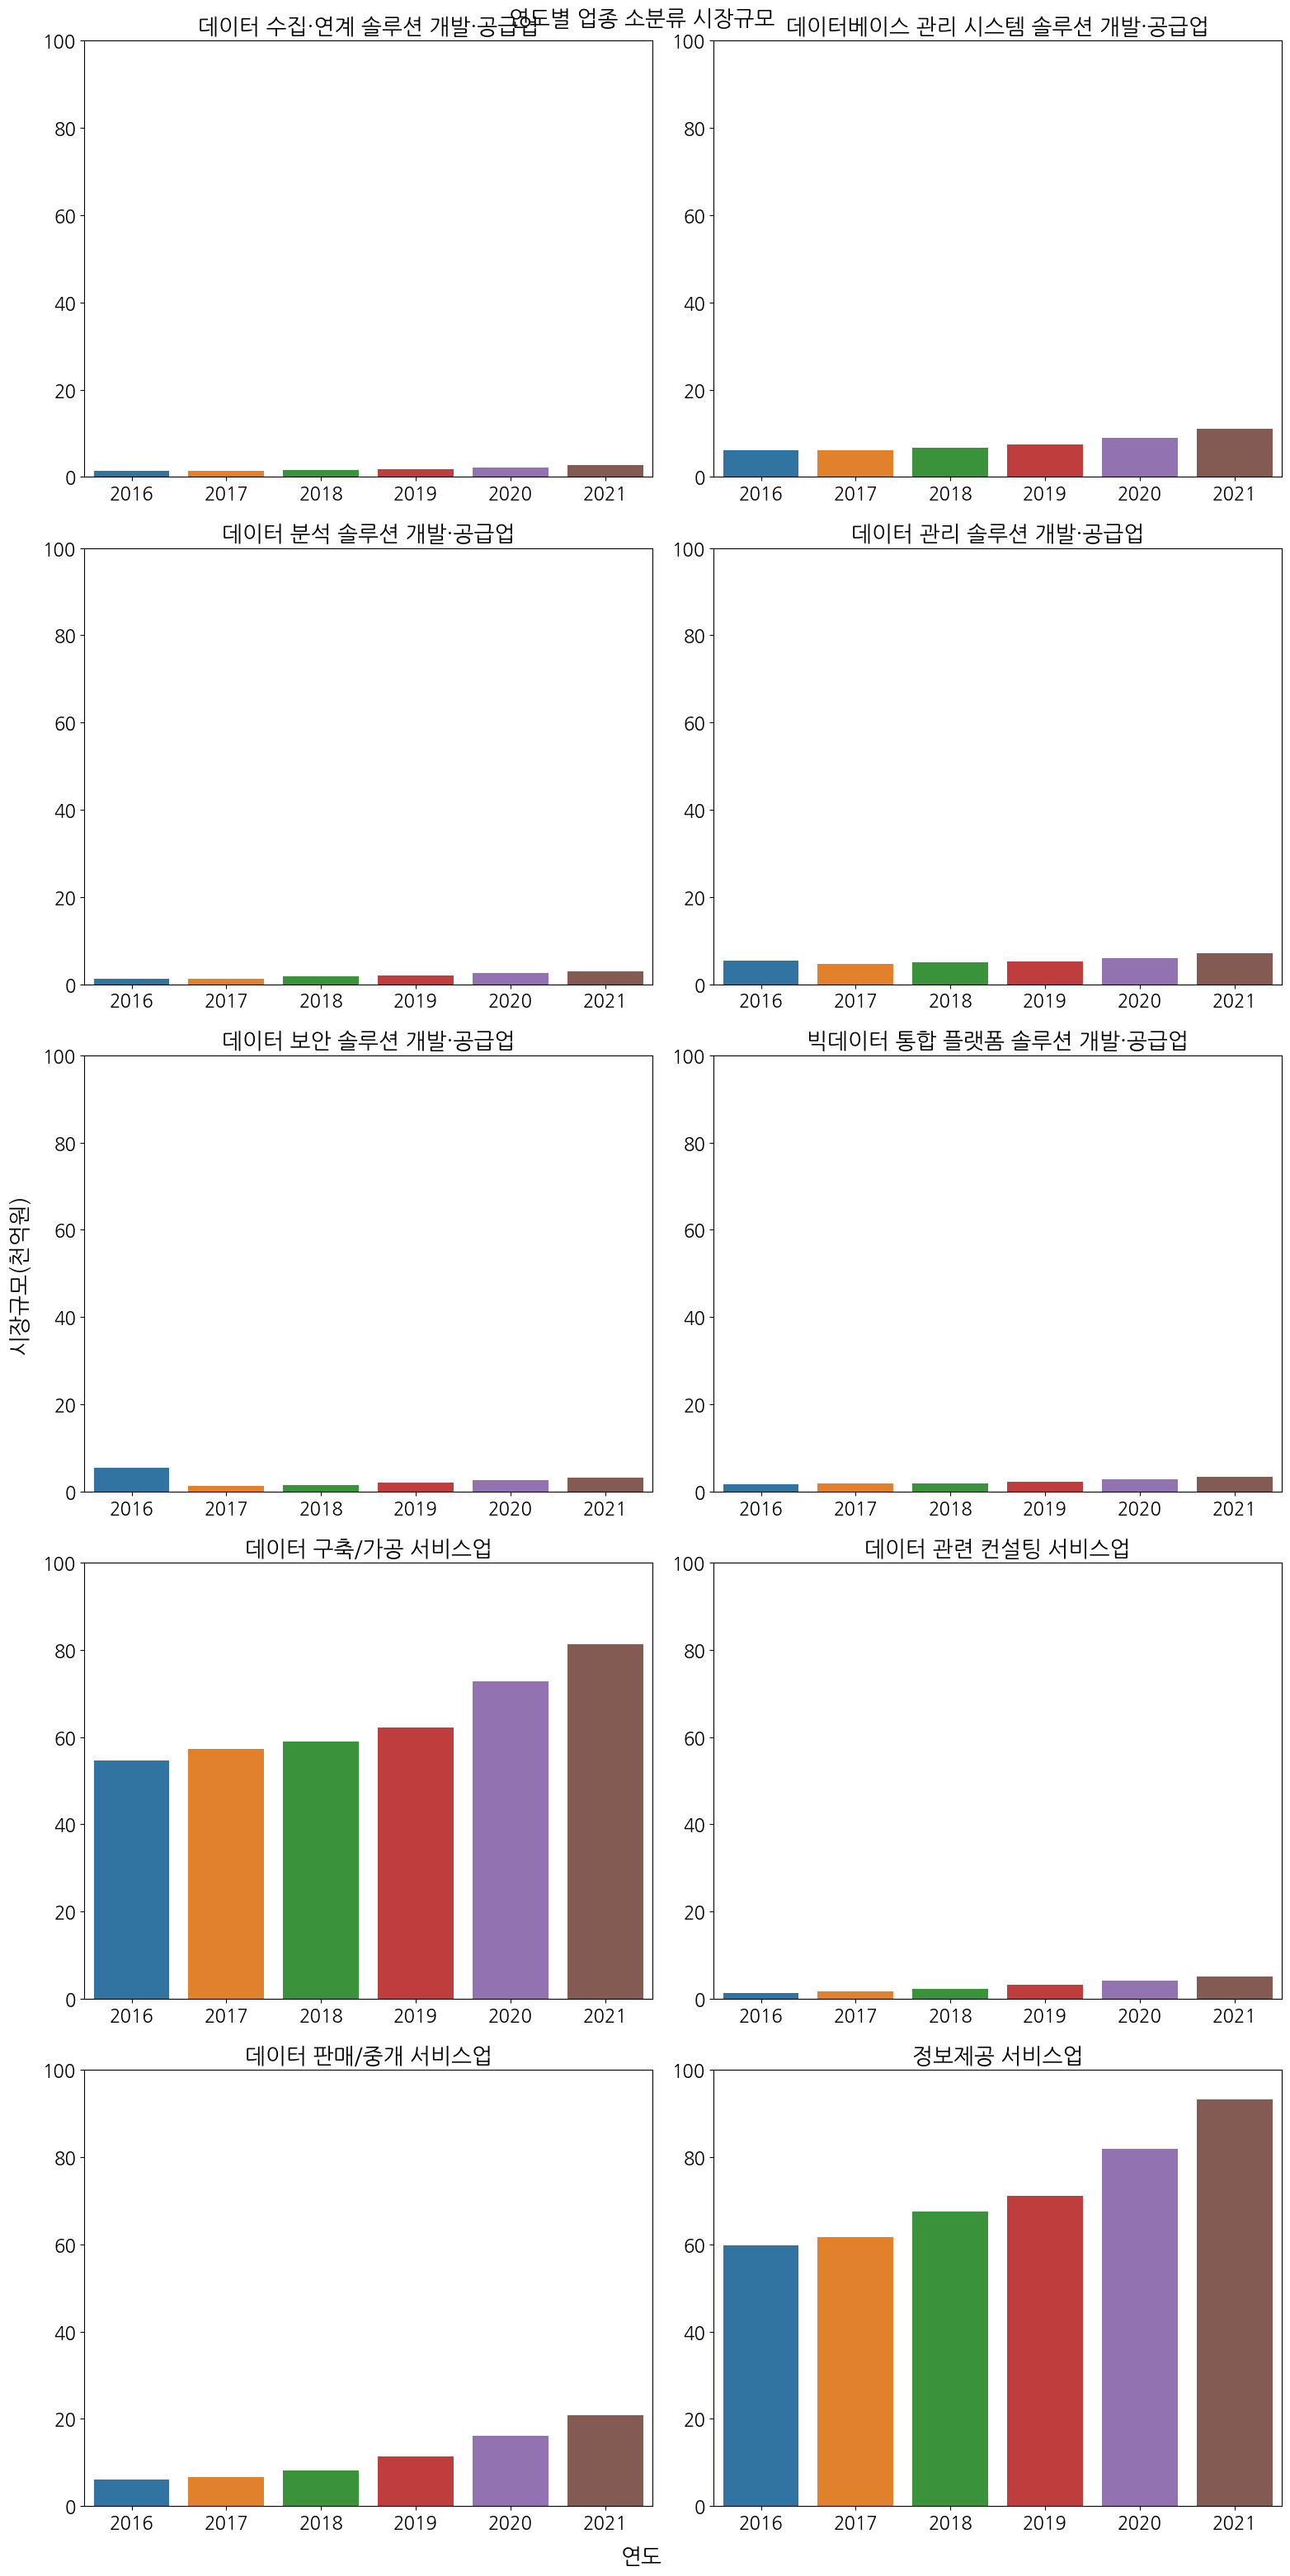

In [69]:
# 소분류 영위 기업수 시각화 - barplot
plt.rcParams["figure.figsize"] = (16,32)
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(5,2)

fig.suptitle("연도별 업종 소분류 시장규모")
fig.supxlabel("연도")
fig.supylabel("시장규모(천억원)")

for index in range(len(sub_ids_report.index)):
    sns.barplot(x=sub_ids_report.columns.astype(int), 
                y=sub_ids_report.iloc[index], 
                ax=axs[index // 2, index % 2])
    axs[index // 2, index % 2].set_ylim(0, 100)
    axs[index // 2, index % 2].set_title(sub_ids_report.index[index])
    axs[index // 2, index % 2].set_ylabel(None)
plt.tight_layout()
plt.show()

#### 6-2) lineplot

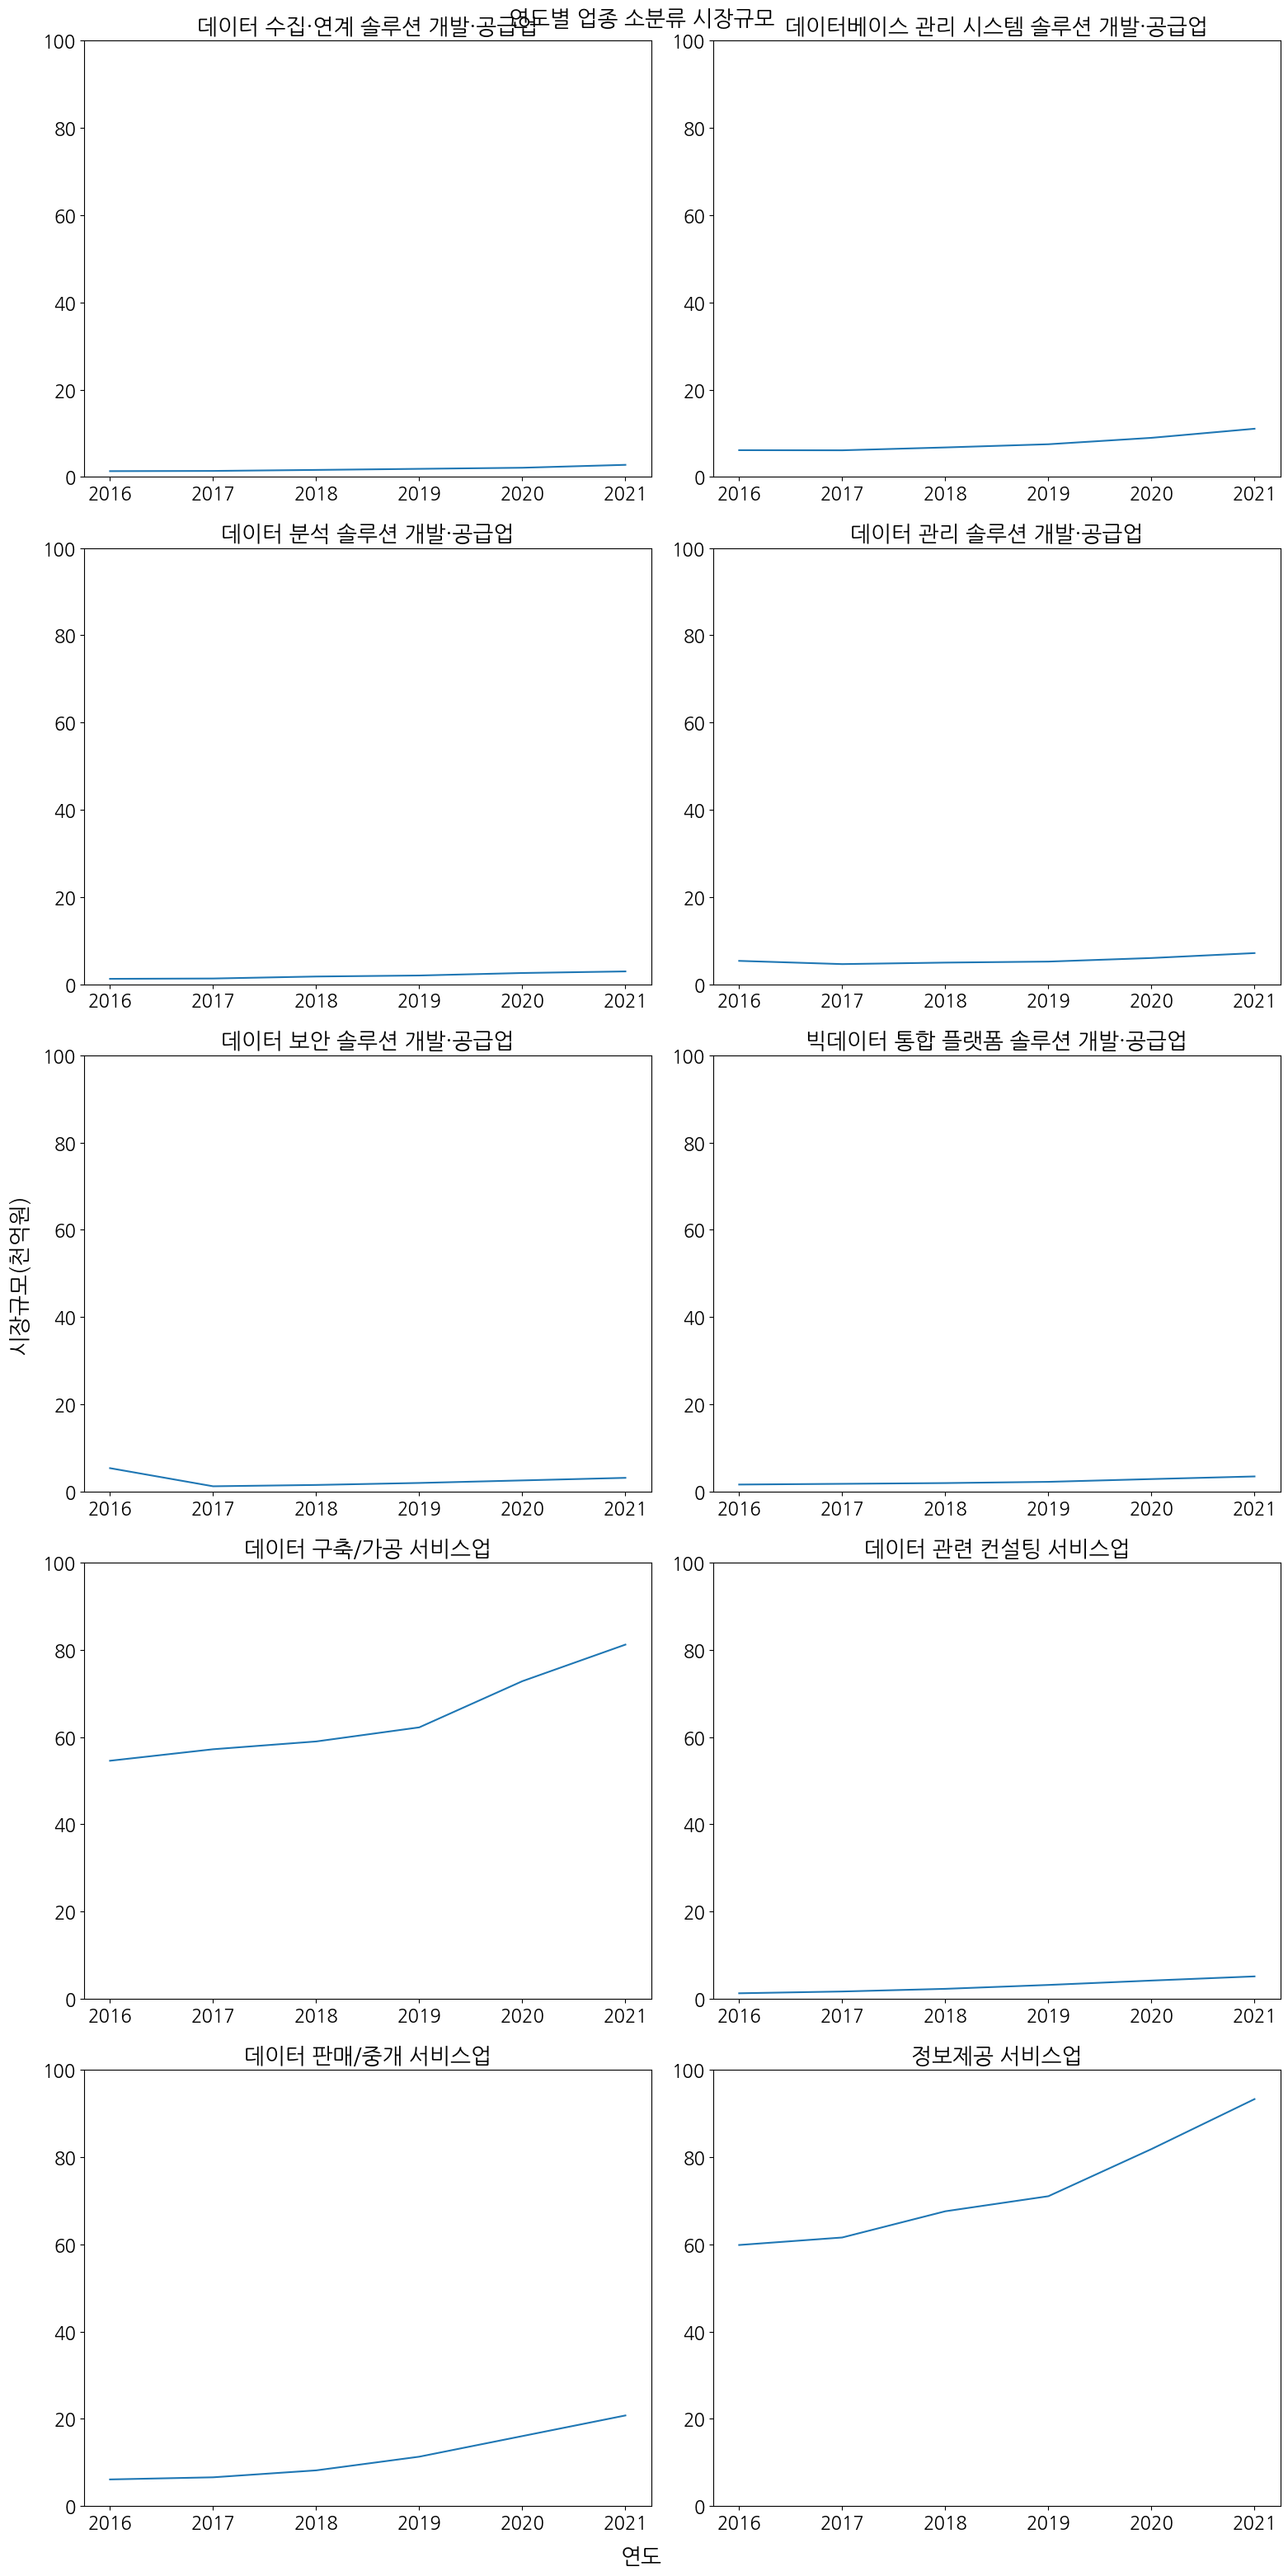

In [70]:
# 소분류 영위 기업수 시각화 - barplot
plt.rcParams["figure.figsize"] = (16,32)
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(5,2)

fig.suptitle("연도별 업종 소분류 시장규모")
fig.supxlabel("연도")
fig.supylabel("시장규모(천억원)")

for index in range(len(sub_ids_report.index)):
    sns.lineplot(x=sub_ids_report.columns.astype(int), 
                y=sub_ids_report.iloc[index], 
                ax=axs[index // 2, index % 2])
    axs[index // 2, index % 2].set_ylim(0, 100)
    axs[index // 2, index % 2].set_title(sub_ids_report.index[index])
    axs[index // 2, index % 2].set_ylabel(None)
plt.tight_layout()
plt.show()

#### 7) 2021년도 업종 소분류 시장규모 - piechart

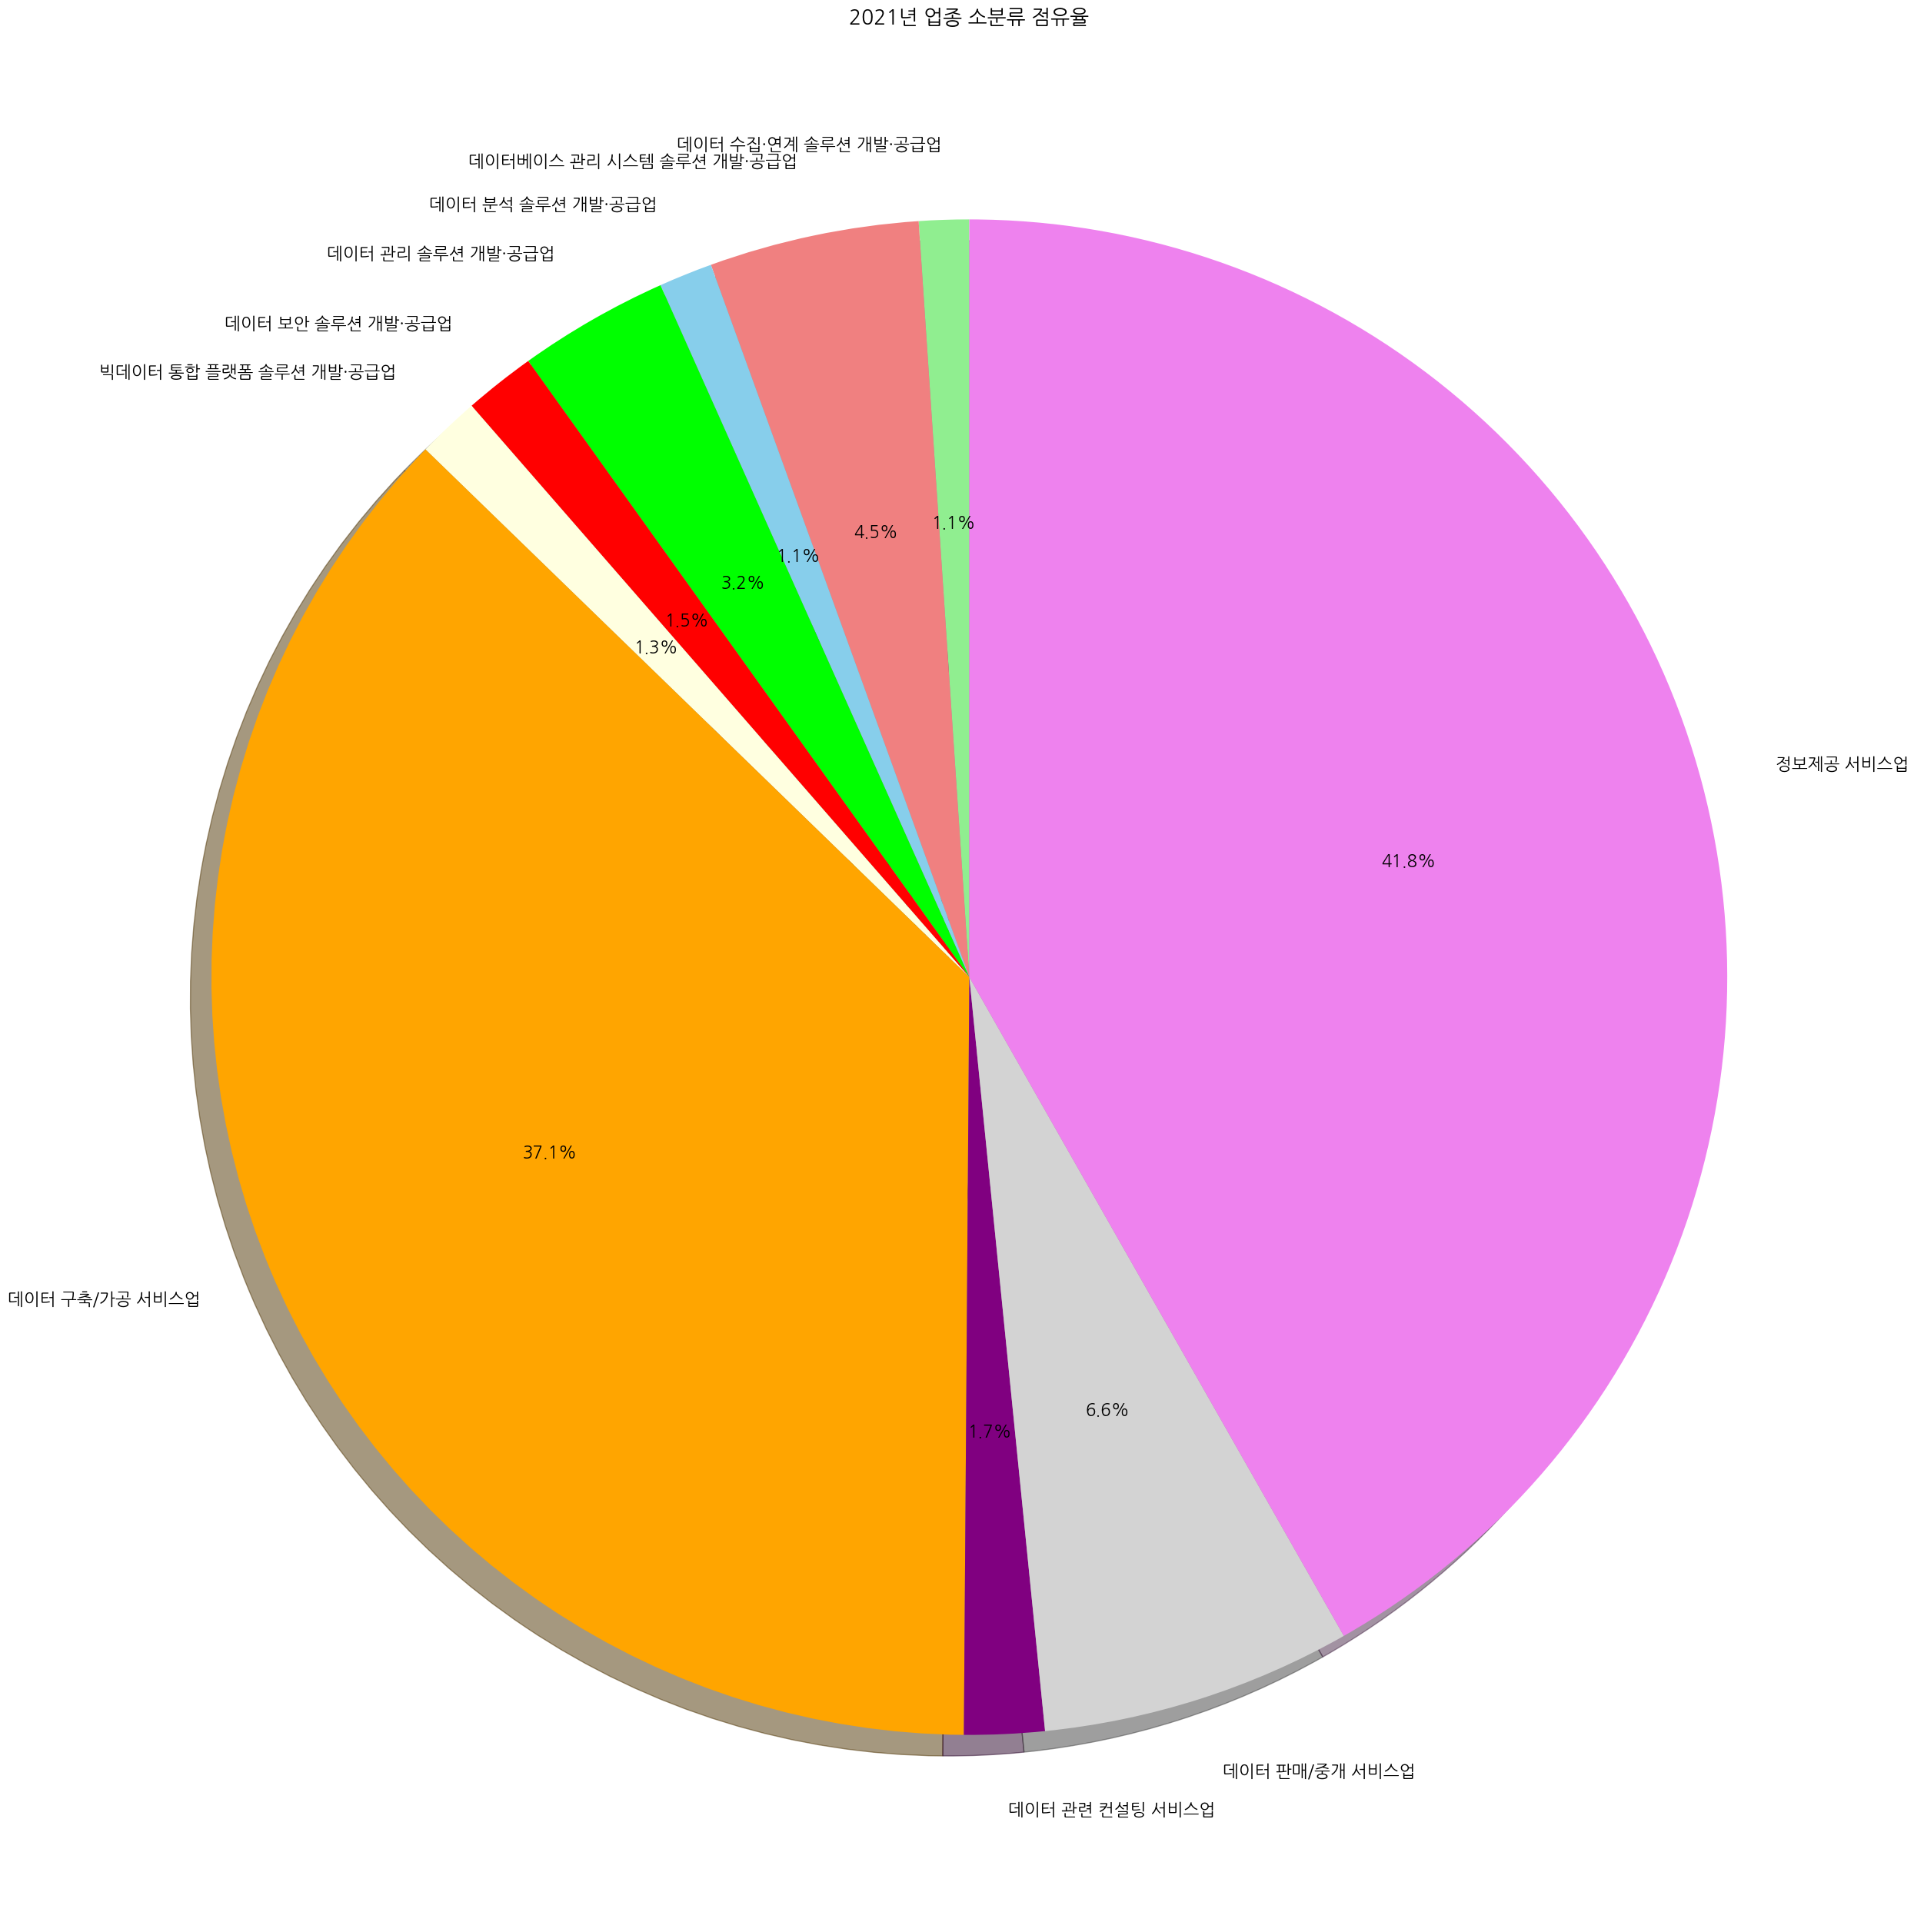

In [74]:
# 2021년 소분류 영위 기업수 시각화 - pie chart
sub_total = sub_ids_report.round(1).sum(axis=1)
sub_totals = ((sub_total / sub_total.sum()) * 100)

explode = [0,0,0,0,0,0,0,0,0,0]
colors = ['lightgreen', 'lightcoral', 'skyblue', 'lime', 'red', 'lightyellow', 'orange', 'purple', 'lightgrey', 'violet']

fig = plt.figure(figsize=(32,32))
plt.title('2021년 업종 소분류 점유율')
plt.pie(sub_totals.values, explode=explode, labels=sub_totals.index, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()